In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Loading the Data

In [20]:
d=pd.read_csv("D:/TASK-1/DATA/SALESDATA.csv")

C:\Users\Haseena\New folder\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [21]:
d.head()

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,...,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,10000481.0,30-04-17,-237.91,2017-04-30,100012.0,NaN,NaN,Urban Large Eggs,2000.0,0.00,...,0.0,237.91,237.910000,1.0,184.0,EA,NaN,U/M = unit of measure,NaN,NaN
1,10002220.0,14-07-17,368.79,2017-07-14,100233.0,P01,20910,Moms Sliced Turkey,1000.0,824.96,...,0.0,456.17,456.170000,1.0,127.0,EA,NaN,NaN,NaN,NaN
2,10002220.0,17-10-17,109.73,2017-10-17,116165.0,P01,38076,Cutting Edge Foot-Long Hot Dogs,1000.0,548.66,...,0.0,438.93,438.930000,1.0,127.0,EA,NaN,EA = each,NaN,NaN
3,10002489.0,03-06-17,-211.75,2017-06-03,100096.0,NaN,NaN,Kiwi Lox,1000.0,0.00,...,0.0,211.75,211.750000,1.0,160.0,EA,NaN,NaN,NaN,NaN
4,10004516.0,27-05-17,96627.94,2017-05-27,103341.0,P01,60776,High Top Sweet Onion,1000.0,408.52,...,0.0,89248.66,196.150901,455.0,124.0,SE,NaN,SE = some SI unit like kgs or gallons,NaN,NaN


## EXPLORATORY DATA ANALYSIS(EDA)

In [22]:
d.shape

(65535, 24)

In [23]:
d.columns

Index(['CustKey', 'DateKey', 'Discount Amount', 'Invoice Date',
       'Invoice Number', 'Item Class', 'Item Number', 'Item', 'Line Number',
       'List Price', 'Order Number', 'Promised Delivery Date', 'Sales Amount',
       'Sales Amount Based on List Price', 'Sales Cost Amount',
       'Sales Margin Amount', 'Sales Price', 'Sales Quantity', 'Sales Rep',
       'U/M', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23'],
      dtype='object')

In [24]:
d.drop(['Unnamed: 20','Unnamed: 21','Unnamed: 22','Unnamed: 23'],axis=1,inplace=True)

In [25]:
d.columns

Index(['CustKey', 'DateKey', 'Discount Amount', 'Invoice Date',
       'Invoice Number', 'Item Class', 'Item Number', 'Item', 'Line Number',
       'List Price', 'Order Number', 'Promised Delivery Date', 'Sales Amount',
       'Sales Amount Based on List Price', 'Sales Cost Amount',
       'Sales Margin Amount', 'Sales Price', 'Sales Quantity', 'Sales Rep',
       'U/M'],
      dtype='object')

In [26]:
# Checking for NULL Values

d.isnull().sum()

CustKey                              253
DateKey                              253
Discount Amount                      255
Invoice Date                         253
Invoice Number                       253
Item Class                          8542
Item Number                          294
Item                                 253
Line Number                          253
List Price                           253
Order Number                         253
Promised Delivery Date               253
Sales Amount                         253
Sales Amount Based on List Price     253
Sales Cost Amount                    253
Sales Margin Amount                  253
Sales Price                          254
Sales Quantity                       253
Sales Rep                            253
U/M                                  253
dtype: int64

In [27]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CustKey                           65282 non-null  float64
 1   DateKey                           65282 non-null  object 
 2   Discount Amount                   65280 non-null  float64
 3   Invoice Date                      65282 non-null  object 
 4   Invoice Number                    65282 non-null  float64
 5   Item Class                        56993 non-null  object 
 6   Item Number                       65241 non-null  object 
 7   Item                              65282 non-null  object 
 8   Line Number                       65282 non-null  float64
 9   List Price                        65282 non-null  float64
 10  Order Number                      65282 non-null  float64
 11  Promised Delivery Date            65282 non-null  object 
 12  Sale

In [29]:
d.columns

Index(['CustKey', 'DateKey', 'Discount Amount', 'Invoice Date',
       'Invoice Number', 'Item Class', 'Item Number', 'Item', 'Line Number',
       'List Price', 'Order Number', 'Promised Delivery Date', 'Sales Amount',
       'Sales Amount Based on List Price', 'Sales Cost Amount',
       'Sales Margin Amount', 'Sales Price', 'Sales Quantity', 'Sales Rep',
       'U/M'],
      dtype='object')

In [33]:
print(d['Item Class'].unique())
print(d['Item Class'].value_counts())

[nan 'P01' 'PO1']
P01    56977
PO1       16
Name: Item Class, dtype: int64


In [34]:
#Droping Item class feature since contains more number of nan values and single class have more values

d.drop('Item Class',axis=1,inplace=True)

In [35]:
d.columns

Index(['CustKey', 'DateKey', 'Discount Amount', 'Invoice Date',
       'Invoice Number', 'Item Number', 'Item', 'Line Number', 'List Price',
       'Order Number', 'Promised Delivery Date', 'Sales Amount',
       'Sales Amount Based on List Price', 'Sales Cost Amount',
       'Sales Margin Amount', 'Sales Price', 'Sales Quantity', 'Sales Rep',
       'U/M'],
      dtype='object')

In [36]:
d.isnull().sum()

CustKey                             253
DateKey                             253
Discount Amount                     255
Invoice Date                        253
Invoice Number                      253
Item Number                         294
Item                                253
Line Number                         253
List Price                          253
Order Number                        253
Promised Delivery Date              253
Sales Amount                        253
Sales Amount Based on List Price    253
Sales Cost Amount                   253
Sales Margin Amount                 253
Sales Price                         254
Sales Quantity                      253
Sales Rep                           253
U/M                                 253
dtype: int64

In [37]:
# Droping the records having Nan values

d.dropna(axis=0,inplace=True)



In [38]:
d.isnull().sum()

CustKey                             0
DateKey                             0
Discount Amount                     0
Invoice Date                        0
Invoice Number                      0
Item Number                         0
Item                                0
Line Number                         0
List Price                          0
Order Number                        0
Promised Delivery Date              0
Sales Amount                        0
Sales Amount Based on List Price    0
Sales Cost Amount                   0
Sales Margin Amount                 0
Sales Price                         0
Sales Quantity                      0
Sales Rep                           0
U/M                                 0
dtype: int64

In [39]:
d.shape

(65241, 19)

## UNIVARIANT ANALYSIS

In [40]:
d.columns

Index(['CustKey', 'DateKey', 'Discount Amount', 'Invoice Date',
       'Invoice Number', 'Item Number', 'Item', 'Line Number', 'List Price',
       'Order Number', 'Promised Delivery Date', 'Sales Amount',
       'Sales Amount Based on List Price', 'Sales Cost Amount',
       'Sales Margin Amount', 'Sales Price', 'Sales Quantity', 'Sales Rep',
       'U/M'],
      dtype='object')

In [55]:
#Custkey

d['CustKey'].astype('int')

c=d['CustKey'].value_counts().head(10)



Float64Index([10025919.0, 10019194.0, 10012715.0, 10012226.0, 10025025.0,
              10023524.0, 10020515.0, 10017638.0, 10022456.0, 10002506.0],
             dtype='float64')

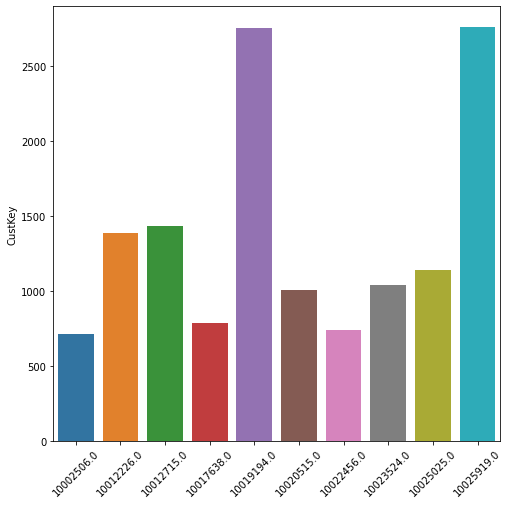

In [61]:
plt.figure(figsize=(8,8))
sns.barplot(x=c.index,y=c,data=d)
plt.xticks(rotation=45)
plt.show()

In [63]:
#DateKey 

d['DateKey'].value_counts()

23-06-17    460
05-07-19    447
27-06-17    313
18-11-17    313
11-01-17    310
           ... 
08-02-19     23
03-07-19      7
21-06-17      7
07-06-17      3
19-06-19      3
Name: DateKey, Length: 558, dtype: int64

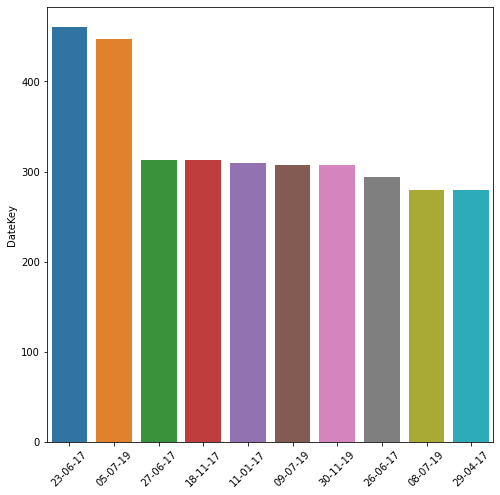

In [65]:
date=d['DateKey'].value_counts().head(10)

plt.figure(figsize=(8,8))

sns.barplot(x=date.index,y=date)

plt.xticks(rotation=45)

plt.show()

In [66]:
d.columns

Index(['CustKey', 'DateKey', 'Discount Amount', 'Invoice Date',
       'Invoice Number', 'Item Number', 'Item', 'Line Number', 'List Price',
       'Order Number', 'Promised Delivery Date', 'Sales Amount',
       'Sales Amount Based on List Price', 'Sales Cost Amount',
       'Sales Margin Amount', 'Sales Price', 'Sales Quantity', 'Sales Rep',
       'U/M'],
      dtype='object')

In [69]:
#Discount Amount

d['Discount Amount'].describe()

count     65241.000000
mean       1857.310923
std        9039.535784
min     -255820.800000
25%         246.280000
50%         442.200000
75%        1001.500000
max      343532.660000
Name: Discount Amount, dtype: float64

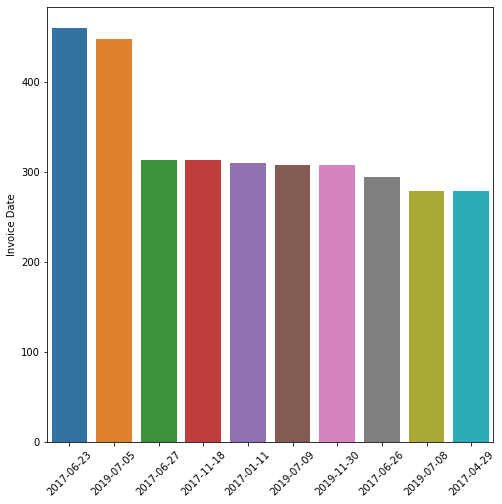

In [71]:
#InVoice Date

Invoice=d['Invoice Date'].value_counts().head(10)

plt.figure(figsize=(8,8))

sns.barplot(x=Invoice.index,y=Invoice)

plt.xticks(rotation=45)

plt.show()

In [72]:
d.columns

Index(['CustKey', 'DateKey', 'Discount Amount', 'Invoice Date',
       'Invoice Number', 'Item Number', 'Item', 'Line Number', 'List Price',
       'Order Number', 'Promised Delivery Date', 'Sales Amount',
       'Sales Amount Based on List Price', 'Sales Cost Amount',
       'Sales Margin Amount', 'Sales Price', 'Sales Quantity', 'Sales Rep',
       'U/M'],
      dtype='object')

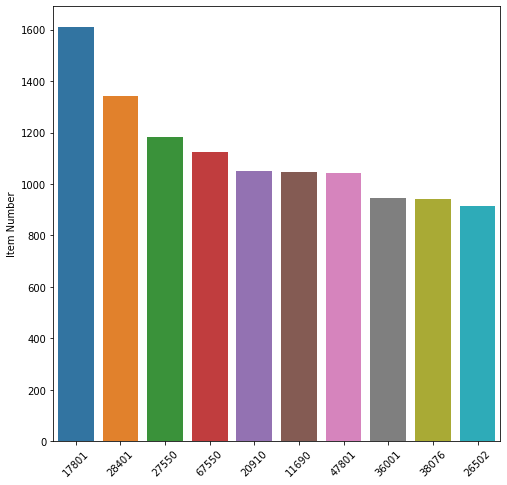

In [74]:
#Item Number

Item=d['Item Number'].value_counts().head(10)

plt.figure(figsize=(8,8))

sns.barplot(x=Item.index,y=Item)

plt.xticks(rotation=45)

plt.show()

In [75]:
d.columns

Index(['CustKey', 'DateKey', 'Discount Amount', 'Invoice Date',
       'Invoice Number', 'Item Number', 'Item', 'Line Number', 'List Price',
       'Order Number', 'Promised Delivery Date', 'Sales Amount',
       'Sales Amount Based on List Price', 'Sales Cost Amount',
       'Sales Margin Amount', 'Sales Price', 'Sales Quantity', 'Sales Rep',
       'U/M'],
      dtype='object')

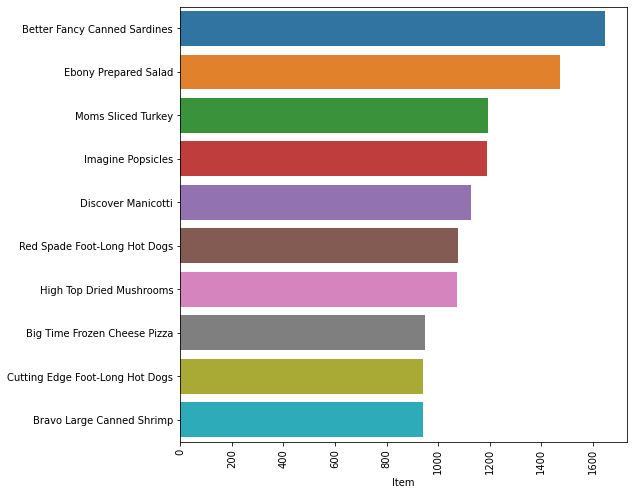

In [83]:
#Item

i=d['Item'].value_counts().head(10)

plt.figure(figsize=(8,8))

sns.barplot(y=i.index,x=i)

plt.xticks(rotation=90)

plt.show()

In [84]:
d.columns

Index(['CustKey', 'DateKey', 'Discount Amount', 'Invoice Date',
       'Invoice Number', 'Item Number', 'Item', 'Line Number', 'List Price',
       'Order Number', 'Promised Delivery Date', 'Sales Amount',
       'Sales Amount Based on List Price', 'Sales Cost Amount',
       'Sales Margin Amount', 'Sales Price', 'Sales Quantity', 'Sales Rep',
       'U/M'],
      dtype='object')

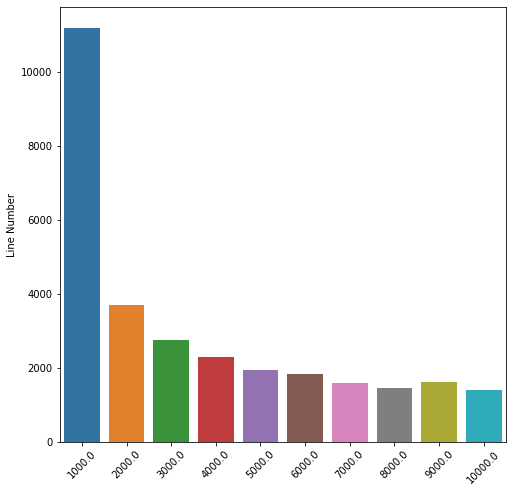

In [86]:
#Line Number

l=d['Line Number'].value_counts().head(10)

plt.figure(figsize=(8,8))

sns.barplot(x=l.index,y=l)

plt.xticks(rotation=45)

plt.show()

In [87]:
d.columns

Index(['CustKey', 'DateKey', 'Discount Amount', 'Invoice Date',
       'Invoice Number', 'Item Number', 'Item', 'Line Number', 'List Price',
       'Order Number', 'Promised Delivery Date', 'Sales Amount',
       'Sales Amount Based on List Price', 'Sales Cost Amount',
       'Sales Margin Amount', 'Sales Price', 'Sales Quantity', 'Sales Rep',
       'U/M'],
      dtype='object')

In [88]:
#List Price

d['List Price'].describe()

count    65241.000000
mean       515.016834
std        449.144896
min          0.000000
25%        181.560000
50%        325.190000
75%        803.860000
max       2760.700000
Name: List Price, dtype: float64

In [89]:
d.columns

Index(['CustKey', 'DateKey', 'Discount Amount', 'Invoice Date',
       'Invoice Number', 'Item Number', 'Item', 'Line Number', 'List Price',
       'Order Number', 'Promised Delivery Date', 'Sales Amount',
       'Sales Amount Based on List Price', 'Sales Cost Amount',
       'Sales Margin Amount', 'Sales Price', 'Sales Quantity', 'Sales Rep',
       'U/M'],
      dtype='object')

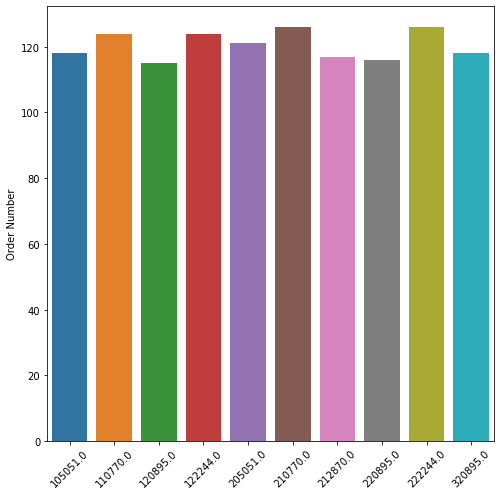

In [91]:
# Order Number

o=d['Order Number'].value_counts().head(10)

plt.figure(figsize=(8,8))

sns.barplot(x=o.index,y=o)

plt.xticks(rotation=45)

plt.show()

In [92]:
d.columns

Index(['CustKey', 'DateKey', 'Discount Amount', 'Invoice Date',
       'Invoice Number', 'Item Number', 'Item', 'Line Number', 'List Price',
       'Order Number', 'Promised Delivery Date', 'Sales Amount',
       'Sales Amount Based on List Price', 'Sales Cost Amount',
       'Sales Margin Amount', 'Sales Price', 'Sales Quantity', 'Sales Rep',
       'U/M'],
      dtype='object')

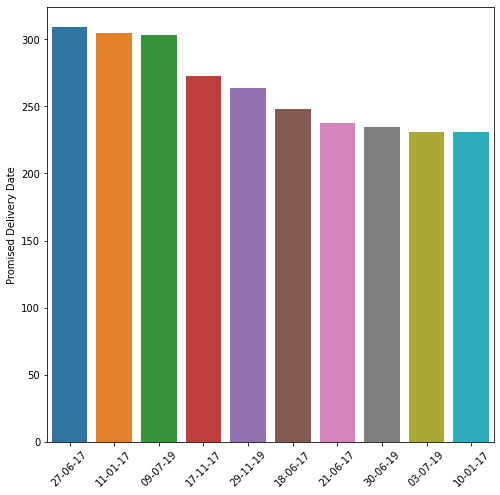

In [95]:
#Promised Delivery

p=d['Promised Delivery Date'].value_counts().head(10)

plt.figure(figsize=(8,8))

sns.barplot(x=p.index,y=p)

plt.xticks(rotation=45)

plt.show()

In [96]:
d.columns

Index(['CustKey', 'DateKey', 'Discount Amount', 'Invoice Date',
       'Invoice Number', 'Item Number', 'Item', 'Line Number', 'List Price',
       'Order Number', 'Promised Delivery Date', 'Sales Amount',
       'Sales Amount Based on List Price', 'Sales Cost Amount',
       'Sales Margin Amount', 'Sales Price', 'Sales Quantity', 'Sales Rep',
       'U/M'],
      dtype='object')

In [97]:
d['Sales Amount'].describe()

count     65241.000000
mean       2853.121051
std       15169.020896
min         200.010000
25%         308.310000
50%         553.940000
75%        1279.750000
max      555376.000000
Name: Sales Amount, dtype: float64

In [98]:
d.columns

Index(['CustKey', 'DateKey', 'Discount Amount', 'Invoice Date',
       'Invoice Number', 'Item Number', 'Item', 'Line Number', 'List Price',
       'Order Number', 'Promised Delivery Date', 'Sales Amount',
       'Sales Amount Based on List Price', 'Sales Cost Amount',
       'Sales Margin Amount', 'Sales Price', 'Sales Quantity', 'Sales Rep',
       'U/M'],
      dtype='object')

In [99]:
# SALES AMOUNT BASED ON LIST PRICE

d['Sales Amount Based on List Price'].describe()

count     65241.000000
mean       4710.431974
std       20702.609533
min           0.000000
25%         561.040000
50%         999.750000
75%        2321.400000
max      632610.160000
Name: Sales Amount Based on List Price, dtype: float64

In [100]:
d['Sales Cost Amount'].describe()

count     65241.000000
mean       1662.023052
std        9559.396917
min           0.000000
25%         167.810000
50%         304.580000
75%         688.550000
max      366576.000000
Name: Sales Cost Amount, dtype: float64

In [101]:
d.columns

Index(['CustKey', 'DateKey', 'Discount Amount', 'Invoice Date',
       'Invoice Number', 'Item Number', 'Item', 'Line Number', 'List Price',
       'Order Number', 'Promised Delivery Date', 'Sales Amount',
       'Sales Amount Based on List Price', 'Sales Cost Amount',
       'Sales Margin Amount', 'Sales Price', 'Sales Quantity', 'Sales Rep',
       'U/M'],
      dtype='object')

In [102]:
d['Sales Margin Amount'].describe()

count     65241.000000
mean       1191.097999
std        5862.566647
min       -3932.930000
25%         129.890000
50%         246.480000
75%         578.220000
max      188800.000000
Name: Sales Margin Amount, dtype: float64

In [103]:
d['Sales Price'].describe()

count    65241.000000
mean       283.250283
std        250.448615
min          0.337341
25%        100.030000
50%        183.282857
75%        448.220000
max       6035.000000
Name: Sales Price, dtype: float64

In [105]:
d.columns

Index(['CustKey', 'DateKey', 'Discount Amount', 'Invoice Date',
       'Invoice Number', 'Item Number', 'Item', 'Line Number', 'List Price',
       'Order Number', 'Promised Delivery Date', 'Sales Amount',
       'Sales Amount Based on List Price', 'Sales Cost Amount',
       'Sales Margin Amount', 'Sales Price', 'Sales Quantity', 'Sales Rep',
       'U/M'],
      dtype='object')

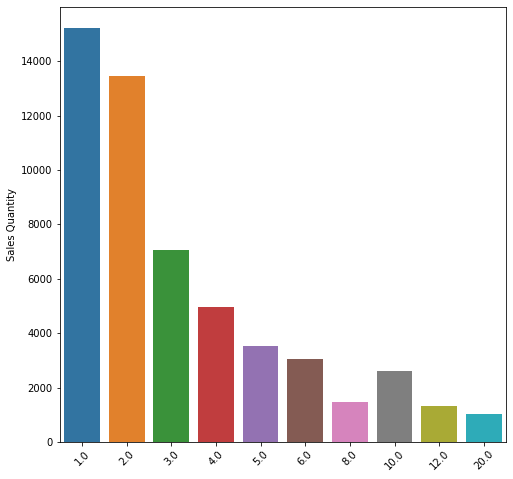

In [107]:
s=d['Sales Quantity'].value_counts().head(10)

plt.figure(figsize=(8,8))

sns.barplot(x=s.index,y=s)

plt.xticks(rotation=45)

plt.show()

## QUARTERLY SALES

In [166]:
q=pd.read_csv('D:/TASK-1/DATA/Quaterly_Sales.csv')

q

,Month,SalesVolume
0,March,2145.0
1,April,2458.0
2,May,1245.0
3,Sales Values in Q2,NaN
4,June,5124.0
5,July,7421.0
6,August,2584.0
7,Sales Values in Q3,NaN
8,September,5314.0
9,October,7846.0


In [170]:
#First Quarter
q1=q.iloc[:3,:]

#Second Quarter
q2=q.iloc[4:7,:]

#Third Quarter
q3=q.iloc[8:11,:]

#Fourth Quarter
q4=q.iloc[11:14,:]

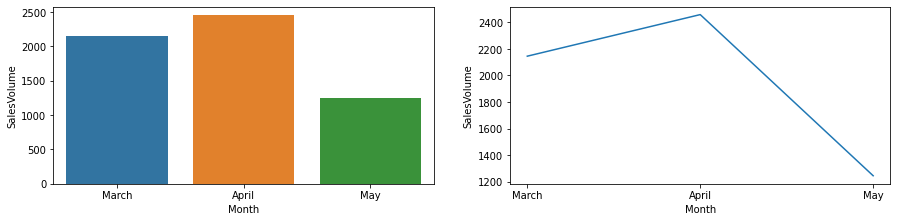

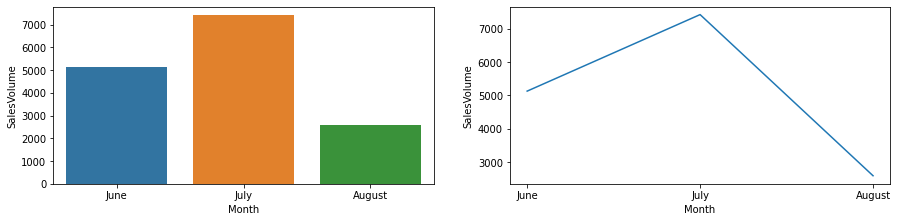

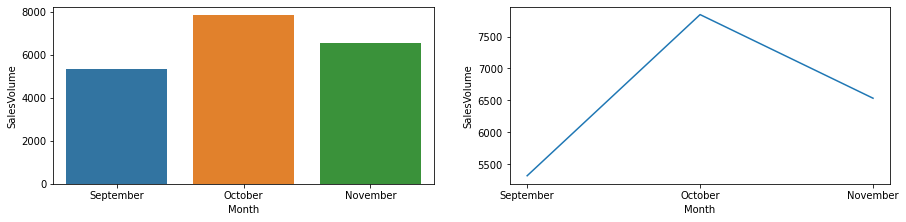

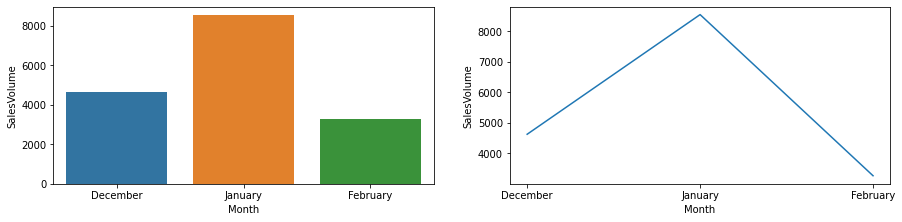

In [171]:
plt.figure(figsize=(15,15))

plt.subplot(4,2,1)

sns.barplot(x='Month',y='SalesVolume',data=q1)

plt.subplot(4,2,2)

sns.lineplot(data=q1,x='Month',y='SalesVolume')




plt.figure(figsize=(15,15))

plt.subplot(4,2,3)

sns.barplot(x='Month',y='SalesVolume',data=q2)

plt.subplot(4,2,4)

sns.lineplot(data=q2,x='Month',y='SalesVolume')

plt.show()




plt.figure(figsize=(15,15))

plt.subplot(4,2,5)

sns.barplot(x='Month',y='SalesVolume',data=q3)

plt.subplot(4,2,6)

sns.lineplot(data=q3,x='Month',y='SalesVolume')

plt.show()




plt.figure(figsize=(15,15))

plt.subplot(4,2,7)

sns.barplot(x='Month',y='SalesVolume',data=q4)

plt.subplot(4,2,8)

sns.lineplot(data=q4,x='Month',y='SalesVolume')

plt.show()

In [172]:
d.columns

Index(['CustKey', 'DateKey', 'Discount Amount', 'Invoice Date',
       'Invoice Number', 'Item Number', 'Item', 'Line Number', 'List Price',
       'Order Number', 'Promised Delivery Date', 'Sales Amount',
       'Sales Amount Based on List Price', 'Sales Cost Amount',
       'Sales Margin Amount', 'Sales Price', 'Sales Quantity', 'Sales Rep',
       'U/M'],
      dtype='object')

In [175]:
d['DateKey'].head(10)

1     14-07-17
2     17-10-17
4     27-05-17
6     03-09-17
7     18-06-17
8     18-06-17
9     18-06-17
10    18-06-17
11    18-06-17
12    16-09-17
Name: DateKey, dtype: object

## YEARLY SALES

In [178]:
Sales_2017=int(d[d['DateKey'].between('01-01-17', '31-12-17')]['Sales Quantity'].sum())

In [181]:
Sales_2018=int(d[d['DateKey'].between('01-01-18','31-12-18')]['Sales Quantity'].sum())

In [184]:
print(Sales_2017,Sales_2018)

2938153 2935131


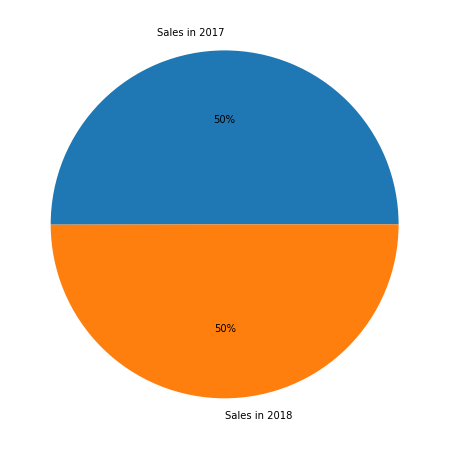

In [193]:
year=['Sales in 2017','Sales in 2018']

yearly_sales=[Sales_2017,Sales_2018]

plt.figure(figsize=(8,8))


plt.pie(x=yearly_sales,labels=year,autopct='%.0f%%')


plt.show()

## Monthly Sales in year 2017

In [218]:
d['DateKey'] = pd.to_datetime(d['DateKey'])


Sales_2017_Jan=int(d[(d['DateKey'] > '2017-01-01') & (d['DateKey'] <= '2017-02-01')]['Sales Quantity'].sum())

Sales_2017_Feb=int(d[(d['DateKey'] > '2017-02-01') & (d['DateKey'] <= '2017-03-01')]['Sales Quantity'].sum())

Sales_2017_Mar=int(d[(d['DateKey'] > '2017-03-01') & (d['DateKey'] <= '2017-04-01')]['Sales Quantity'].sum())

Sales_2017_Apr=int(d[(d['DateKey'] > '2017-04-01') & (d['DateKey'] <= '2017-05-01')]['Sales Quantity'].sum())

Sales_2017_May=int(d[(d['DateKey'] > '2017-05-01') & (d['DateKey'] <= '2017-06-01')]['Sales Quantity'].sum())

Sales_2017_June=int(d[(d['DateKey'] > '2017-06-01') & (d['DateKey'] <= '2017-07-01')]['Sales Quantity'].sum())

Sales_2017_July=int(d[(d['DateKey'] > '2017-07-01') & (d['DateKey'] <= '2017-08-01')]['Sales Quantity'].sum())

Sales_2017_Aug=int(d[(d['DateKey'] > '2017-08-01') & (d['DateKey'] <= '2017-09-01')]['Sales Quantity'].sum())

Sales_2017_Sept=int(d[(d['DateKey'] > '2017-09-01') & (d['DateKey'] <= '2017-10-01')]['Sales Quantity'].sum())

Sales_2017_Oct=int(d[(d['DateKey'] > '2017-10-01') & (d['DateKey'] <= '2017-11-01')]['Sales Quantity'].sum())

Sales_2017_Nov=int(d[(d['DateKey'] > '2017-11-01') & (d['DateKey'] <= '2017-12-01')]['Sales Quantity'].sum())

Sales_2017_Dec=int(d[(d['DateKey'] > '2017-12-01') & (d['DateKey'] <= '2018-01-01')]['Sales Quantity'].sum())

monthly_sales=[Sales_2017_Jan,Sales_2017_Feb,Sales_2017_Mar,Sales_2017_Apr,Sales_2017_May,Sales_2017_June,Sales_2017_July,
              Sales_2017_Aug,Sales_2017_Sept,Sales_2017_Oct,Sales_2017_Nov,Sales_2017_Dec]

months=['January','Febraury','March','April','May','June','July','August','September','October','November','December']

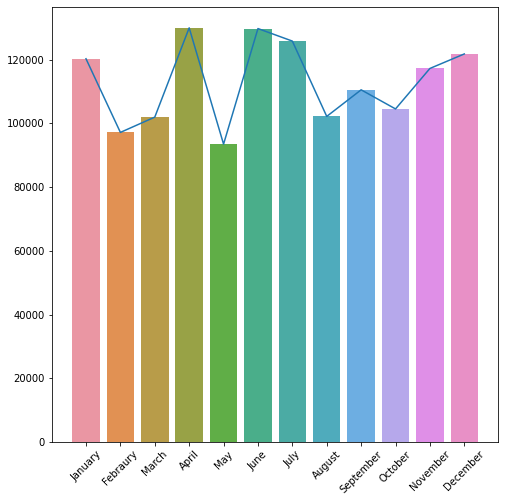

In [222]:
plt.figure(figsize=(8,8))

sns.barplot(x=months,y=monthly_sales)

sns.lineplot(x=months,y=monthly_sales)

plt.xticks(rotation=45)

plt.show()

In [223]:
d['DateKey'] = pd.to_datetime(d['DateKey'])


Sales_2018_Jan=int(d[(d['DateKey'] > '2018-01-01') & (d['DateKey'] <= '2018-02-01')]['Sales Quantity'].sum())

Sales_2018_Feb=int(d[(d['DateKey'] > '2018-02-01') & (d['DateKey'] <= '2018-03-01')]['Sales Quantity'].sum())

Sales_2018_Mar=int(d[(d['DateKey'] > '2018-03-01') & (d['DateKey'] <= '2018-04-01')]['Sales Quantity'].sum())

Sales_2018_Apr=int(d[(d['DateKey'] > '2018-04-01') & (d['DateKey'] <= '2018-05-01')]['Sales Quantity'].sum())

Sales_2018_May=int(d[(d['DateKey'] > '2018-05-01') & (d['DateKey'] <= '2018-06-01')]['Sales Quantity'].sum())

Sales_2018_June=int(d[(d['DateKey'] > '2018-06-01') & (d['DateKey'] <= '2018-07-01')]['Sales Quantity'].sum())

Sales_2018_July=int(d[(d['DateKey'] > '2018-07-01') & (d['DateKey'] <= '2018-08-01')]['Sales Quantity'].sum())

Sales_2018_Aug=int(d[(d['DateKey'] > '2018-08-01') & (d['DateKey'] <= '2018-09-01')]['Sales Quantity'].sum())

Sales_2018_Sept=int(d[(d['DateKey'] > '2018-09-01') & (d['DateKey'] <= '2018-10-01')]['Sales Quantity'].sum())

Sales_2018_Oct=int(d[(d['DateKey'] > '2018-10-01') & (d['DateKey'] <= '2018-11-01')]['Sales Quantity'].sum())

Sales_2018_Nov=int(d[(d['DateKey'] > '2018-11-01') & (d['DateKey'] <= '2018-12-01')]['Sales Quantity'].sum())

Sales_2018_Dec=int(d[(d['DateKey'] > '2018-12-01') & (d['DateKey'] <= '2018-12-31')]['Sales Quantity'].sum())

monthly_sales=[Sales_2018_Jan,Sales_2018_Feb,Sales_2018_Mar,Sales_2018_Apr,Sales_2018_May,Sales_2018_June,Sales_2018_July,
              Sales_2018_Aug,Sales_2018_Sept,Sales_2018_Oct,Sales_2018_Nov,Sales_2018_Dec]

months=['January','Febraury','March','April','May','June','July','August','September','October','November','December']

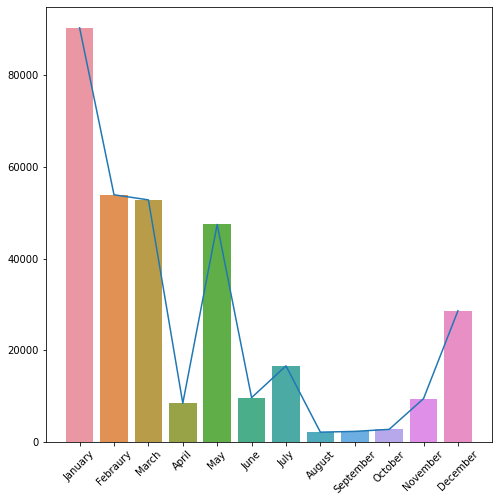

In [224]:
plt.figure(figsize=(8,8))

sns.barplot(x=months,y=monthly_sales)

sns.lineplot(x=months,y=monthly_sales)

plt.xticks(rotation=45)

plt.show()